## Sales Forecasting Using Prophet

This notebook forecasts future monthly revenue using historical retail sales data.
The model captures seasonality and trend patterns to support demand planning and budgeting decisions.

In [1]:
import pandas as pd

df = pd.read_csv("../data/processed/cleaned_retail_data.csv")
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [3]:
monthly_sales = (
    df.groupby(df["InvoiceDate"].dt.to_period("M"))["Revenue"]
    .sum()
    .reset_index()
)

monthly_sales["InvoiceDate"] = monthly_sales["InvoiceDate"].dt.to_timestamp()
monthly_sales.head()

,InvoiceDate,Revenue
0,2009-12-01,686654.160
1,2010-01-01,557319.062
2,2010-02-01,506371.066
3,2010-03-01,699608.991
4,2010-04-01,594609.192


In [5]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [7]:
from prophet import Prophet

prophet_df = monthly_sales.rename(
    columns={"InvoiceDate": "ds", "Revenue": "y"}
)

model = Prophet()
model.fit(prophet_df)

future = model.make_future_dataframe(periods=3, freq="M")
forecast = model.predict(future)

forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

15:53:12 - cmdstanpy - INFO - Chain [1] start processing
15:53:12 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
11,2010-11-01,772258.044847,482983.574407,1.020357e+06
12,2010-12-01,790514.606997,538341.057627,1.055824e+06
13,2010-12-31,808771.169148,552340.837350,1.058853e+06
14,2011-01-31,827636.283369,567682.260085,1.090308e+06
15,2011-02-28,844675.741376,573974.225109,1.121915e+06


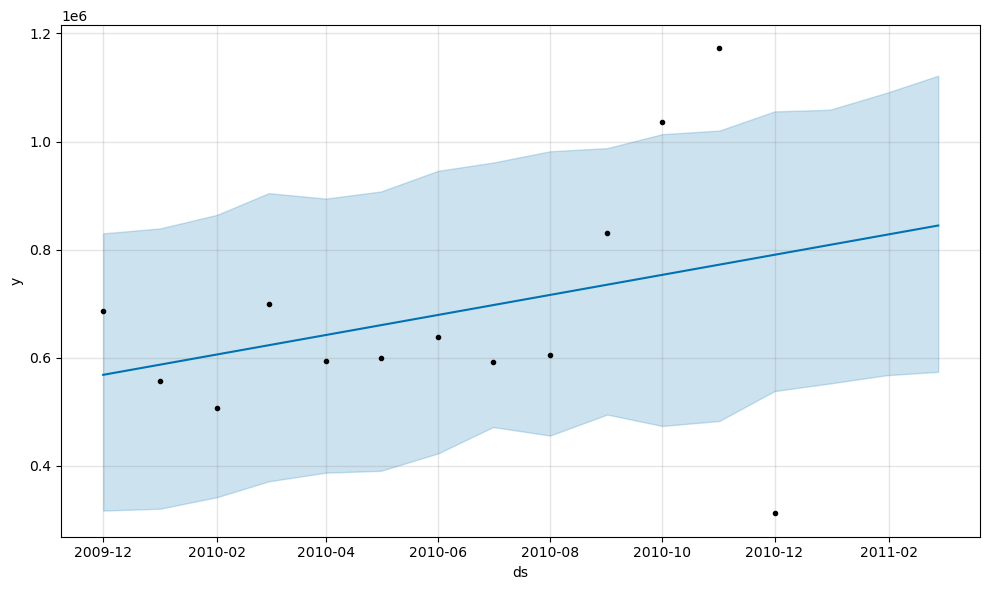

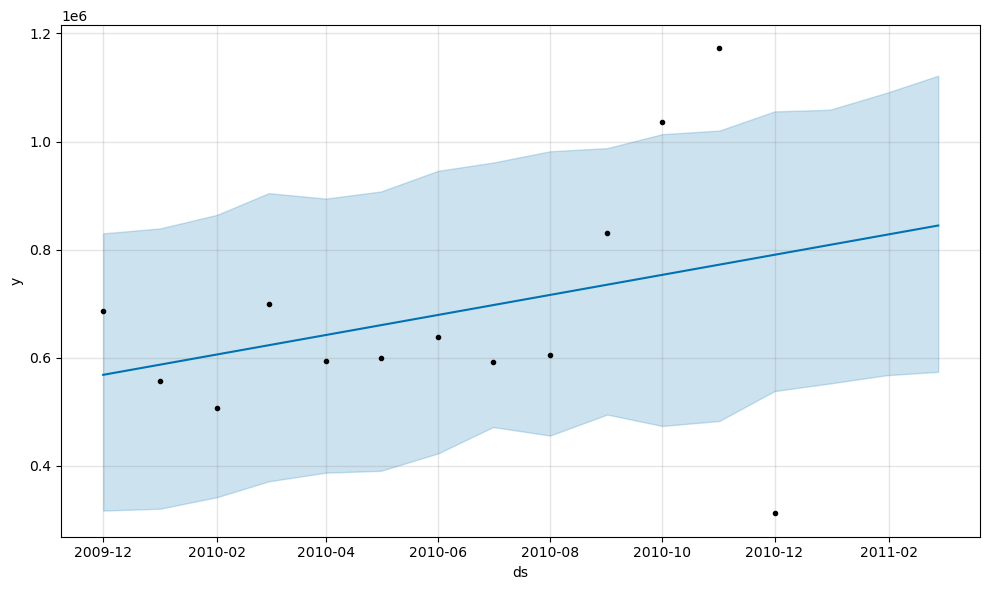

In [9]:
model.plot(forecast)